This notebook contains code to reproduce the schematic analysis/figure

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.distance import cdist

sns.set_context('poster')

%matplotlib inline

In [6]:
datadir = '../../../data/processed/'

In [162]:
movie_text = pd.read_excel('../../../data/raw/Sherlock_Segments_1000_NN_2017.xlsx', )
movie_text['Scene Segments'].fillna(method='ffill', inplace=True)

# create a list of text samples from the scene descriptions / details to train the topic model
movie = movie_text.loc[:,'Scene Details - A Level ':'Words on Screen '].apply(lambda x: ', '.join(x.fillna('')), axis=1).values.tolist()

# create a list of overlapping text samples
movie50 = []
wsize=50
for idx, sentence in enumerate(movie):
    movie50.append(','.join(movie[idx:idx+wsize]))

# description are by scene, not TR so stretch the model to be in TRs
ranges =[[d['Start Time (TRs, 1.5s)'],d['End Time (TRs, 1.5s)']] for i, d in movie_text.iterrows()] 
expanded = []
for i in range(1976):
    try:
        idx = np.where([i>=r[0] and i<=r[1] for r in ranges])[0][0]
        expanded.append(movie50[idx])
    except:
        expanded.append(movie50[0])
movie_text = np.array(expanded)
movie_text.shape

(1976,)

In [152]:
video_model, recall_models = np.load(datadir+'models_t100_v50_r10.npy')
cv = np.load('../../../data/processed/count_vectorizer_model')
tm = np.load('../../../data/processed/topic_model')
recall = pd.read_csv('../../../data//raw/NN13 transcript.txt', header=None, sep='.', 
            error_bad_lines=False, encoding='latin-1')
recall = recall.iloc[:, ~recall.isnull().values.ravel()].values.ravel()[:-1]
recall_windowed = [','.join(recall[i:i+10]) for i in range(len(recall))]
recall_model = tm.transform(cv.transform(recall_windowed))

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


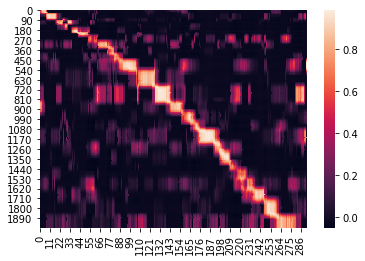

In [153]:
sns.heatmap(1 - cdist(video_model, recall_model, 'correlation'))

In [181]:
corrmat = 1 - cdist(video_model, recall_model, 'correlation')
rng1 = np.linspace(0, corrmat.shape[0], 4).astype(int)
rng2 = np.linspace(0, corrmat.shape[1], 4).astype(int)
first = corrmat[rng1[0]:rng1[1], rng2[0]:rng2[1]]
first_inds = np.unravel_index(np.argmax(first), first.shape)

In [163]:
movie_text[210]

'The woman aide goes over to her male colleague who si standing at the bar. He looks at her in exasperation. He asks: "Is she still dancing?" In the back a banner that says: "Happy Birthday" is visible, meaning that it is Beth\'s birthday celebration., Indoor, Man Aide, Woman Aide, Man Aide, Man Aide, Party Venue, Medium, Yes, ,The woman replies: "Yeah, if you can call it that.", Indoor, Man Aide, Woman Aide, Man Aide, Woman Aide, Woman Aide, Party Venue, Medium, Yes, ,The man aide asks the woman: "Did you get the car keys off her?", Indoor, Man Aide, Woman Aide, Man Aide, Woman Aide, Man Aide, Party Venue, Medium, Yes, ,The woman aide shows him the keys, She says: "Got\'em out of her bag." The man aide smiles with satisfaction. , Indoor, Man Aide, Woman Aide, Man Aide, Woman Aide, Woman Aide, Party Venue, Medium, Yes, ,The Man aide looks into the dance hall and frowns. He asks: "Where is she?", Indoor, Man Aide, Woman Aide, Man Aide, Woman Aide, Man Aide, Party Venue, Medium, Yes, ,Be

In [155]:
recall[45:55]

array([" And the woman you later ?? is Sergeant Donovan, and then the man, the Private, Sergeantâ\x80¦ Are at a news conference with lots of supporters and they're answering questions about the murders, or well no the suicides",
       " And she says yes there's clearly a linkage between these now, there's been three deaths where the same poison that's been taken",
       " And the court reporters, especially one woman, questions how can there be a link between suicides? Like basically skepticism, like suicides can't be linked",
       " And the seemingly incompetent Sergeant answers, well there's the same poison, we've got our best people on it",
       " And when he says there's a link, like there are suicides, like everyone in the room, all their phones go off",
       ' And the screen shows a bunch of, the screen shows the words and they all show wrong',
       " So they've clearly all gotten a text message that says wrong",
       " And then he starts to says something else, like 

In [191]:
second = corrmat[rng1[1]:rng1[2], rng2[1]:rng2[2]]
second_inds = tuple(np.array(np.unravel_index(np.argmax(second), second.shape))+np.array(first.shape))

In [170]:
movie_text[1128]

'Sherlock and Lestrade are keenly watching. , Indoor, Sherlock, Lestrade, Sherlock, , Lauriston Gardens - Crime Scene Room on Third Floor , Medium, Yes, ,John looks closely at the woman\'s skin on her right hand. , Indoor, John, Jennifer Wilson, John, , Lauriston Gardens - Crime Scene Room on Third Floor , Close Up, Yes, ,John says: "Yup." John kneels up and looks across to Sherlock. John continues: "Asphyxiation, probably.", Indoor, John, John, , Lauriston Gardens - Crime Scene Room on Third Floor , Low Angle, Medium, Yes, ,Sherlock looks round to Lestrade, while John says: " Passed out, choked on her own vonmit." , Indoor, Sherlock, Lestrade, John, Sherlock, Lestrade, John, Lauriston Gardens - Crime Scene Room on Third Floor , Medium, Yes, ,John looks up at Sherlock and says: "Can\'t smell any alcohol on her. It could have been a seizure; possibly drugs.", Indoor, John, John, John, Lauriston Gardens - Crime Scene Room on Third Floor , Medium, Yes, ,Sherlock, looking at John, states: 

In [172]:
recall[185:195]

array([" He's like how do you know this? Well the coat is wet, the front the umbrella is dry and the collar is wet so that means it was windy but too strong wind for an umbrella",
       " And she's well dressed but she only had a small case, it must have been an overnight case, so she must not have traveled more than two to three hours, and also he knows that because her coat has not had time to dry",
       ' And he says where has there been rain like that in London, within a two hour radius? This town',
       ' something',
       ' And he knows that she had a case because there are mud splatters on her thigh or her left leg or right leg, so the small case must have left the splatter',
       ' He can tell that it was, the forensic scientist at some point shows up and Sherlock just shuts him down ??? Rachel is or whatever',
       " Or is like where's the case, where's the case? And the guys, the Sergeant's like there never was a case",
       " And Sherlock says what? And Watson's 

In [194]:
third = corrmat[rng1[2]:rng1[3], rng2[2]:rng2[3]]
third_inds = tuple(np.array(np.unravel_index(np.argmax(third), third.shape))+np.array(first.shape)++np.array(second.shape))

In [174]:
movie_text[1853]

'Sherlock impatiently says: "Twenty-two Northumberland Street. Hurry up!" Sherlock flips the dining chair around, setting it down in front of one of the two armchairs near the fireplace. He puts the suitcase onto the dining chair and sits down in the armchair., Indoor, Sherlock, Sherlock, Sherlock, 221B Baker Street Suite , Medium, No, ,John finishes the message: What happened at Lauriston Gdns? I must have blacked out. 22 Northumberland St. Please come. , Indoor, John, John, , 221B Baker Street Suite , Medium, No, What happened at Lauriston Gdns? I must have blacked out. 22 Northumberland St. Please come. ,Sherlock unzips the case and flips open the lid, revealing the contents. There are a few items of clothing and underwear - all in pink - a washbag and a paperback novel by Paul Bunch entitled "Come to Bed Eyes.", Indoor, Sherlock, Sherlock, , 221B Baker Street Suite , Medium, No, ,John turns toward the case and he staggers backward slightly in shock when he realises what he\'s looki

In [175]:
recall[253:263]

array([' So he gives him his phone, and Sherlock sends a text, I think like going out',
       " Go to my desk and there's a number, and please send a text to this number, and Watson every time he obeys an order kind of has to kind of swallow his pride I guess and does",
       ' You got me all the way here to send a text',
       ' So he sends it word for word, and the text is, What happened at Lauridsen Garden? I must have blacked out',
       ' Please come quickly and then he gives an address',
       ' And then Sherlock says he figured it out, like the case, the pink case',
       ' The murderer took the case, that was his first mistake',
       ' Must have taken it by accident',
       ' So exciting, kind of discuss the case, like the he says it must be the murderer, and then they',
       " Watson sits down and Sherlock stands up, and they're talking and Watson realizes he just sent a text to the murderer and Sherlock pulls out the pink case and says he found it, or basically tha

In [206]:
first_topic_ind = np.argmax(video_model[first_inds[0]])
t1_v = video_model[first_inds[0]][first_topic_ind]
t1_r = recall_model[first_inds[1]][first_topic_ind]

second_topic_ind = np.argmax(video_model[second_inds[0]])
t2_v = video_model[second_inds[0]][second_topic_ind]
t2_r = recall_model[second_inds[1]][second_topic_ind]

third_topic_ind = np.argmax(video_model[third_inds[0]])
t3_v = video_model[third_inds[0]][third_topic_ind]
t3_r = recall_model[third_inds[1]][third_topic_ind]

df = pd.DataFrame([t1_v, t2_v, t3_v, t1_r, t2_r, t3_r], columns=['Topic weights'])
df['Condition']=['video']*3+['recall']*3
df['Timepoint']=[1, 2, 3, 1, 2, 3]
df

,Topic weight,Condition,Timepoint
0,0.572379,video,1
1,0.999162,video,2
2,0.747124,video,3
3,0.426213,recall,1
4,0.724730,recall,2
5,0.543211,recall,3


In [268]:
inds = [first_inds, second_inds, third_inds]
topic_inds = [np.argmax(video_model[first_inds[0]]), np.argmax(video_model[second_inds[0]]), np.argmax(video_model[third_inds[0]])]
data = []
for ind in inds:
    for tinds in topic_inds:
        data.append([video_model[ind[0]][tinds], recall_model[ind[1]][tinds]])
data = np.array(data).ravel()
df = pd.DataFrame(data, columns=['Topic weight'])
df['Condition'] = ['Video', 'Recall']*9
df['Timepoint'] = ['One']*6+['Two']*6+['Three']*6
df['Topic'] = ['One', 'One', 'Two', 'Two', 'Three', 'Three']*3

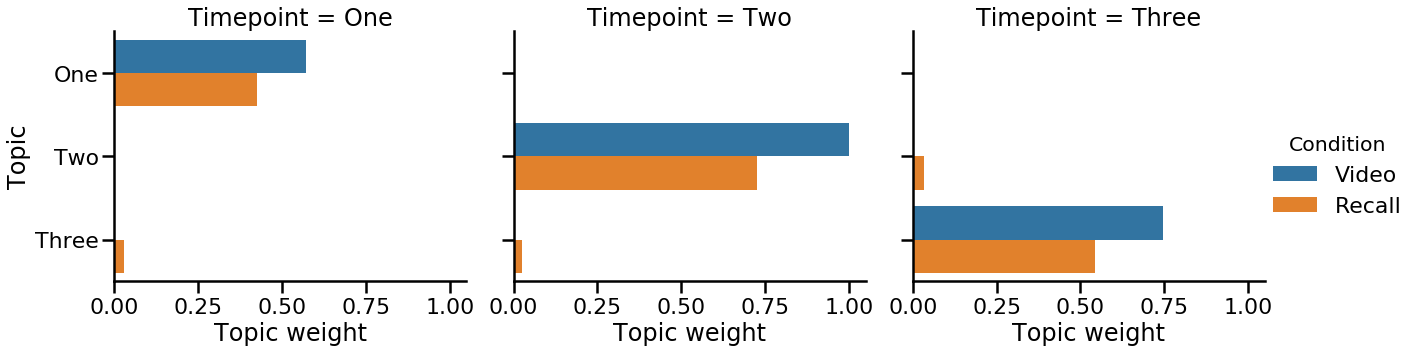

In [271]:
mpl.rcParams['pdf.fonttype'] = 42
sns.catplot(x = 'Topic weight', y='Topic', hue='Condition', data=df, col='Timepoint', kind='bar', aspect=1.2)
plt.savefig('/mnt/schematic.pdf')

## Top words for topics

In [288]:
print(np.array(cv.get_feature_names())[np.argsort(tm.components_[topic_inds[0]])][::-1][:10])
print(np.array(cv.get_feature_names())[np.argsort(tm.components_[topic_inds[1]])][::-1][:10])
print(np.array(cv.get_feature_names())[np.argsort(tm.components_[topic_inds[2]])][::-1][:10])

['lestrade' 'donovan' 'room' 'indoor' 'press' 'conference' 'police'
 'medium' 'reporter' 'reporters']
['sherlock' 'lestrade' 'john' 'indoor' 'medium' 'gardens' 'lauriston'
 'room' 'floor' 'crime']
['sherlock' 'john' 'suite' 'street' '221b' 'baker' 'indoor' 'medium'
 'says' 'asks']
